In [1]:
from nicosload import read_pad_file
import matplotlib.pyplot as plt
import numpy as np
from datafile import Datafile


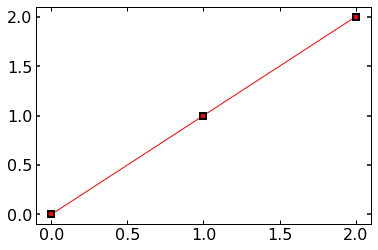

In [1]:
import matplotlib
matplotlib.use('qt5agg')
%matplotlib inline
plt.plot(range(3))
plt.show()

In [1]:
import matplotlib

matplotlib.use('qt5agg')
plt.plot(range(3))

In [1]:
from nicosload import read_nicos_file,read_pad_file

In [ ]:
%matplotlib inline
plt.ioff()
all_areas = np.zeros((11,81))
all_centers = np.zeros((11,81))
all_amplitudes = np.zeros((11,81))
all_sigmas = np.zeros((11,81))
all_amplitudesErr = np.zeros_like(all_amplitudes)

dtx_vals = [k for k in range(10,260,30)]+[400,600]
sth_vals = np.linspace(-0.2,-1.8,81)
for file in range(4814,5705):
    break
    dtx_ind,sth_ind = divmod(file-4814,81)
    print(file,dtx_vals[dtx_ind],sth_vals[sth_ind])
for file in range(4814,5705):
    
    dtx_ind,sth_ind = divmod(file-4814,81)
    data,meta = read_pad_file('data/pad_files/0032{}.pad'.format(file))
    integrated = np.sum(data,axis = 0)
    dat1 = Datafile('asdf')
    dat1.fig,dat1.ax = plt.subplots(1,1)
    res = dat1.fit_gauss([k for k in range(len(integrated))],integrated,peaks = 2,\
                         plotout=False, errs= integrated**0.5,xlabel = 'x',vlines = False)
    centers = [res.params['g0_center'].value,res.params['g1_center'].value]
    areas = [res.params['g0_area'].value,res.params['g1_area'].value]
    amplitudes = [res.params['g0_area'].value /res.params['g0_sigma'].value,\
                 res.params['g1_area'].value /res.params['g1_sigma'].value]
    
    cenErr = [res.params['g0_center'].stderr,res.params['g1_center'].stderr]
    areaErr= [res.params['g0_area'].stderr,res.params['g1_area'].stderr]
    ampErr = [amplitudes[i]* ((cenErr[i]/centers[i])**2 + (areaErr[i]/areas[i])**2)**0.5 for i in range(2)]
    
    
    sigmas = [res.params['g0_sigma'].value,res.params['g1_sigma'].value]
    i = centers.index(max(centers))
    
    
    print('dtx',dtx_vals[dtx_ind],'sth',sth_vals[sth_ind],centers[i])
    all_sigmas[dtx_ind,sth_ind] = sigmas[i]
    all_amplitudes[dtx_ind,sth_ind] = amplitudes[i]
    all_amplitudesErr[dtx_ind,sth_ind]= ampErr[i]
    all_areas[dtx_ind,sth_ind] = areas[i]
    all_centers[dtx_ind,sth_ind] = centers[i]
    
    
    
    #dat1.fig.savefig('data/pad_files/0032{}.pdf'.format(file),bbox_inches = 'tight')
    plt.close(dat1.fig)
    #all_amplitudes(sigma*(2*np.pi)**0.5)
    #plt.plot(integrated)
#save the data 
#np.savetxt()
np.savetxt('fit_data/amps',all_amplitudes)
np.savetxt('fit_data/amp_err',all_amplitudesErr)
np.savetxt('fit_data/sigmas',all_sigmas)
np.savetxt('fit_data/centers',all_centers)

In [3]:
np.savetxt('fit_data/amps',all_amplitudes)
np.savetxt('fit_data/amp_err',all_amplitudesErr)
np.savetxt('fit_data/sigmas',all_sigmas)
np.savetxt('fit_data/centers',all_centers)

NameError: name &#39;all_amplitudes&#39; is not defined

fuck


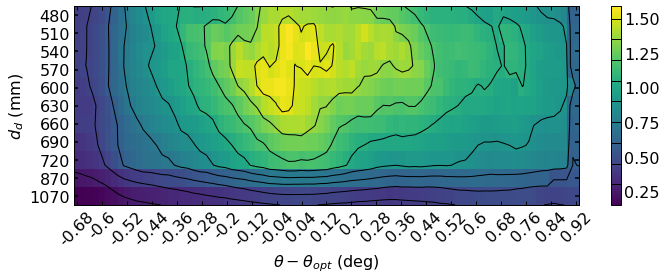

In [2]:
#%matplotlib qt
#plt.style.use('/home/cherb/anaconda3/pkgs/matplotlib-3.1.0-py37h5429711_0/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/christoph.mplstyle')
from nicosload import read_nicos_file, read_pad_file
#%matplotlib inline
dtx_vals = [k for k in range(10, 260, 30)]+[400, 600]
sth_vals = np.linspace(-0.2, -1.8, 81)
sth_opt = -1.12
print('fuck')
all_amplitudes = np.loadtxt('fit_data/amps')
all_amplitudesErr = np.loadtxt('fit_data/amp_err')
all_sigmas = np.loadtxt('fit_data/centers')
all_centers = np.loadtxt('fit_data/sigmas')
#plt.switch_backend('Qt5Agg')

################################### nice image colour plot ######################################
fig = plt.figure(figsize = (10, 4))
ax = fig.add_subplot(1, 1, 1)



font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
im = ax.imshow(all_amplitudes[:, ::-1]/10**6, extent=(0, len(sth_vals), 0, len(dtx_vals)), aspect = 'auto')

ax.set_xlabel('sth (deg)')
ax.set_ylabel('dtx (mm)')
ax.tick_params(axis='x', rotation=45)
ax.axes.yaxis.set_ticks([k+0.5 for k in range(0,11)])
ax.axes.yaxis.set_ticklabels([k + 470 for k in dtx_vals][::])
ax.grid()
#ax.set_title([k + 470 for k in range(10,260,30)]+[870,1070])
#ax.set_title('Amplitude map')
fig.tight_layout()

############################ Contour plot #####################################################ä#
#fig = plt.figure(figsize = (10,4))
#ax = fig.add_subplot(1,1,1)



font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

bl= ax.contour(all_amplitudes[::-1,::-1]/10**6, extent=(0,len(sth_vals),0,len(dtx_vals)), colors = 'black',aspect = 'auto',levels = 10,\
              linewidths = 1)
#cl= ax.contour(all_amplitudes[::-1,::-1]/10**6,extent=(0,len(sth_vals),0,len(dtx_vals)),aspect = 'auto',levels = 10,linewidths = 1)
#cb = fig.colorbar(im)
ax.set_xlabel(r'$\theta - \theta_{opt}$ (deg)')
ax.set_ylabel('$d_d$ (mm)')

ax.tick_params(axis='x', rotation=45)

ax.axes.yaxis.set_ticks([k+0.5 for k in range(len(dtx_vals))])
ax.axes.yaxis.set_ticklabels([k + 470 for k in dtx_vals][::-1])

ax.axes.xaxis.set_ticks([k+0.5 for k in range(0,len(sth_vals),4)])
ax.axes.xaxis.set_ticklabels([round(k-sth_opt,2) for k in sth_vals][::-4])
#ax.axes.yaxis.set_ticks([k+0.5 for k in range(0,11)])
#ax.axes.yaxis.set_ticklabels([k + 470 for k in dtx_vals][::-1])
ax.grid()
#ax.set_title([k + 470 for k in range(10,260,30)]+[870,1070])
#ax.set_title('Amplitude map')
cb = fig.colorbar(im)
cb.add_lines(bl)
#cb2 = fig.colorbar(bl,)
fig.tight_layout()
#fig.savefig("paper_images/firstnight.pdf",bbox_inches = 'tight')
fig.savefig('/home/cherb/Desktop/LRZ Sync+Share/Doktorarbeit/Mieze/Mieze_Foc/images/paper/firstnightMap.pdf',bbox_inches = 'tight')


# Test with contourf plot and indication of points of measurements

[ 0.92  0.9   0.88  0.86  0.84  0.82  0.8   0.78  0.76  0.74  0.72  0.7
  0.68  0.66  0.64  0.62  0.6   0.58  0.56  0.54  0.52  0.5   0.48  0.46
  0.44  0.42  0.4   0.38  0.36  0.34  0.32  0.3   0.28  0.26  0.24  0.22
  0.2   0.18  0.16  0.14  0.12  0.1   0.08  0.06  0.04  0.02  0.   -0.02
 -0.04 -0.06 -0.08 -0.1  -0.12 -0.14 -0.16 -0.18 -0.2  -0.22 -0.24 -0.26
 -0.28 -0.3  -0.32 -0.34 -0.36 -0.38 -0.4  -0.42 -0.44 -0.46 -0.48 -0.5
 -0.52 -0.54 -0.56 -0.58 -0.6  -0.62 -0.64 -0.66 -0.68]
[480 510 540 570 600 630 660 690 720]
(1000, 1000)
xi (1000,)


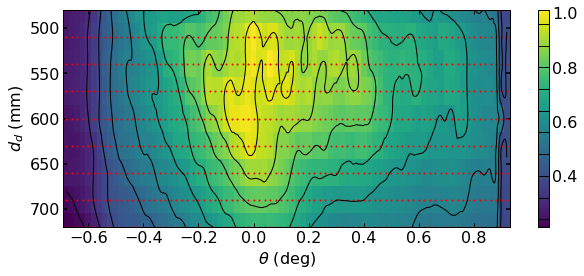

In [14]:
from scipy.interpolate import griddata
dtx_vals = np.array([k for k in range(10, 260, 30)]+[400, 600])+470
sth_vals = np.linspace(-0.2, -1.8, 81)
plt.style.use('/home/cherb/LRZSync/Doktorarbeit/Vorlagen_Verschiedenes/stylelibs/christoph.mplstyle')
sth_opt = -1.12
all_amplitudes = np.loadtxt('fit_data/amps')[:-2,:]
all_amplitudesErr = np.loadtxt('fit_data/amp_err')
all_sigmas = np.loadtxt('fit_data/centers')
all_centers = np.loadtxt('fit_data/sigmas')
x = np.array(sth_vals)-sth_opt
print(x)
xi = np.linspace(x[0]+0.01, x[-1]-0.01, 1000)
y = dtx_vals[:-2]
print(y)
yi = np.linspace(y[0]-15, y[-1]+15, 1000)
xv, yv = np.meshgrid(x, y) 
xv = xv.flatten()

yv = yv.flatten()
z = all_amplitudes.flatten()
z = z/1570000.0

zi = griddata((xv, yv), z, (xi, yi[:,None]), method='nearest')
print(zi.shape)
# contour the gridded data, plotting dots at the randomly spaced data points.

#CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.jet)
fig, ax = plt.subplots(1, figsize=(10,4))
im = ax.imshow(zi[:, :][::-1, :], extent=(x[0]+0.01, x[-1]-0.01, y[0]-15, y[-1]+15), aspect='auto')
print('xi', xi.shape)
#ax.set_ylim(y[0], y[-1])
zi = griddata((xv, yv), z, (xi[None,:], yi[:,None]), method='cubic')
bl = ax.contour(zi[:, :], levels=10, colors='black', extent=(x[0]+0.01, x[-1]-0.01, y[0]-15, y[-1]+15))
#plt.colorbar() # draw colorbar
# plot data points.
cb = fig.colorbar(im)
cb.add_lines(bl)
ax.set_ylim(y[0], y[-1])
ax.scatter(xv,yv, marker='o', c='red', s=1)
ax.set_xlabel(r'$\theta$ (deg)')
ax.set_ylabel(r'$d_d$ (mm)')
ax.invert_xaxis()
ax.invert_yaxis()
plt.show()
fig.savefig('/home/cherb/LRZSync/Doktorarbeit/Mieze/Mieze_Foc/images/paper/firstnightMap.pdf',bbox_inches = 'tight')

# RBF Test

[ 0.92  0.9   0.88  0.86  0.84  0.82  0.8   0.78  0.76  0.74  0.72  0.7
  0.68  0.66  0.64  0.62  0.6   0.58  0.56  0.54  0.52  0.5   0.48  0.46
  0.44  0.42  0.4   0.38  0.36  0.34  0.32  0.3   0.28  0.26  0.24  0.22
  0.2   0.18  0.16  0.14  0.12  0.1   0.08  0.06  0.04  0.02  0.   -0.02
 -0.04 -0.06 -0.08 -0.1  -0.12 -0.14 -0.16 -0.18 -0.2  -0.22 -0.24 -0.26
 -0.28 -0.3  -0.32 -0.34 -0.36 -0.38 -0.4  -0.42 -0.44 -0.46 -0.48 -0.5
 -0.52 -0.54 -0.56 -0.58 -0.6  -0.62 -0.64 -0.66 -0.68]
[480 510 540 570 600 630 660 690 720]


Text(0.5, 1.0, 'RBF interpolation - multiquadrics')

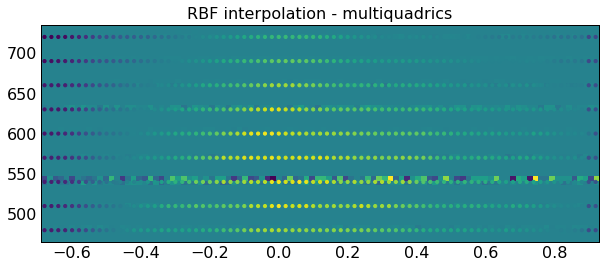

In [1]:

import numpy as np
from scipy.interpolate import Rbf
import matplotlib.pyplot as plt
from matplotlib import cm
from generate_figure import generate_figure
%matplotlib inline

fig, ax = generate_figure((10, 4))
dtx_vals = np.array([k for k in range(10, 260, 30)]+[400, 600])+470
sth_vals = np.linspace(-0.2, -1.8, 81)

sth_opt = -1.12
all_amplitudes = np.loadtxt('fit_data/amps')[:-2,:]
all_amplitudesErr = np.loadtxt('fit_data/amp_err')
all_sigmas = np.loadtxt('fit_data/centers')
all_centers = np.loadtxt('fit_data/sigmas')
x = np.array(sth_vals)-sth_opt
print(x)
xi = np.linspace(x[0]+0.01, x[-1]-0.01, 1000)
y = dtx_vals[:-2]
print(y)
yi = np.linspace(y[0]-15, y[-1]+15, 101)
xi = np.linspace(x[0]+0.01, x[-1]-0.01, 101)
yi = np.linspace(y[0]-15, y[-1]+15)
xv, yv = np.meshgrid(x, y) 
xx = xv.flatten()
yy = yv.flatten()
xi, yi = np.meshgrid(xi, yi)
z = all_amplitudes.flatten()





rbf = Rbf(xx, yy, z, epsilon=2, function='gaussian')
zv = rbf(xi, yi)
ax.pcolor(xi, yi, zv)
ax.scatter(xx, yy, 10, z)
ax.set_title('RBF interpolation - multiquadrics')




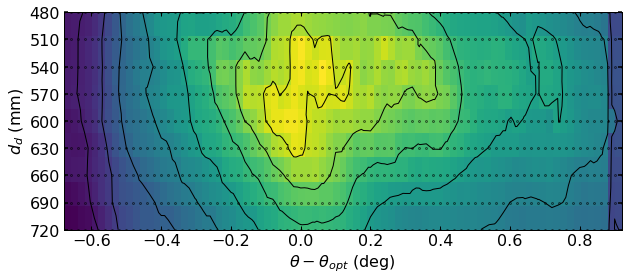

In [17]:
dtx_vals = np.array([k for k in range(10, 260, 30)]+[400, 600])+470
sth_vals = np.linspace(-0.2, -1.8, 81)
sth_opt = -1.12
x = np.array(sth_vals)-sth_opt
y = dtx_vals[:-2]
xv, yv = np.meshgrid(x, y) 
xv = xv.flatten()
yv = yv.flatten()
z = all_amplitudes[:-2, :].flatten()
fig, ax = plt.subplots(1, figsize = (10,4))
ax.imshow(all_amplitudes[:-2, :][::-1,:], extent=[x[0], x[-1], y[0], y[-1]], aspect='auto')
ax.tricontour(xv, yv, z, colors='black', levels=8, extent=[x[0], x[-1], y[0], y[-1]], interpolation='none')
ax.set_yticks(dtx_vals)
ax.invert_yaxis()
ax.invert_xaxis()
ax.plot(xv, yv, 'ko', ms=0.5)
ax.set_xlabel(r'$\theta - \theta_{opt}$ (deg)')
ax.set_ylabel(r'$d_d$ (mm)')
fig.savefig('/home/cherb/Desktop/LRZ Sync+Share/Doktorarbeit/Mieze/Mieze_Foc/images/paper/firstnightMap.pdf',bbox_inches = 'tight')

In [ ]:
import matplotlib
%matplotlib inline
plt.plot(range(10))
plt.show()

lasd 130.0 -1.12


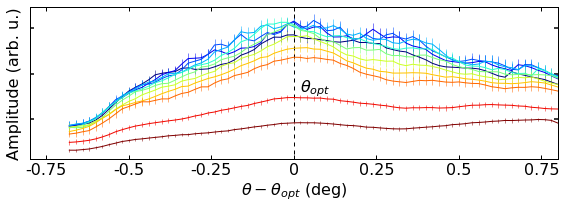

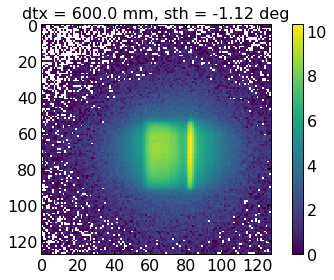

In [10]:
################################### multiplot #################################################



theta_opt = -1.12
fig,ax = plt.subplots(1,1, figsize = (8,3))
vir = plt.get_cmap('jet')
n = 11
color = vir(np.linspace(0, 1,n))
#ax.set_prop_cycle(color =[colormap(i) for i in np.linspace(0, 1, len(all_amplitudes))][::-1])  
for line in range(11):
    
    ax.errorbar(np.linspace(-0.2,-1.8,81),all_amplitudes[line,:]/10**6,\
                all_amplitudesErr[line,:]/10**6,label = '$d_d$ = {} mm'.format(dtx_vals[line]+470),\
                marker = '',linestyle = '-',linewidth = 1, elinewidth = 0.5, color=color[line])
ax.text(-1.1,0.8,r'$\theta_{opt}$', fontsize=16)
#ax.set_xlim(-0.8,-1.4)
#ax.set_ylim(1100000,1650000)
#ax.legend(fontsize = 10, loc = (1.01,0), ncol=2)
ax.set_xlabel(r'$\theta-\theta_{opt}$ (deg)')
ax.set_ylabel('Amplitude (arb. u.)')
ax.set_yticklabels([])
theta_diff = [-0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75]

ax.set_xticks([theta_opt + diff for diff in theta_diff])
ax.set_xticklabels(theta_diff)
ax.set_xlim(-0.8+theta_opt, 0.8+theta_opt)
#print(xlabels)
maxLine = ax.axvline(-1.12,-1,2,color = 'black')
maxLine.set_dashes([4,4])
fig.tight_layout()
fig.savefig('/home/cherb/Desktop/LRZ Sync+Share/Doktorarbeit/Mieze/Mieze_Foc/images/paper/firstnightParmap.pdf',bbox_inches = 'tight')
fig,ax = plt.subplots(1,1)
data,mes = read_pad_file('data/pad_files/0032{}.pad'.format(5184))
ax.set_title('dtx = {} mm, sth = {} deg'.format(mes['dtx_value']+470,mes['sth_value']))
im = ax.imshow(np.log(data[::-1,:]))
cb = fig.colorbar(im)
ax.axes.xaxis.set_ticks([k for k in range(0,140,20)])
ax.axes.yaxis.set_ticks([k for k in range(0,140,20)])
fig.tight_layout()
print('lasd',mes['dtx_value'],mes['sth_value'])
fig.savefig('/home/cherb/Desktop/LRZ Sync+Share/Doktorarbeit/Mieze/Mieze_Foc/images/paper/focus.pdf')
#print(sth_vals[47],dtx_vals[4])

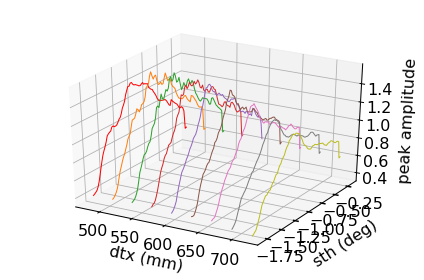

In [4]:
################################### 3Dplot #################################################

from nicosload import read_nicos_file,read_pad_file
dtx_vals = [k for k in range(10,260,30)]+[400,600]
sth_vals = np.linspace(-0.2,-1.8,81)

all_amplitudes = np.loadtxt('fit_data/amps')
all_amplitudesErr = np.loadtxt('fit_data/amp_err')
all_sigmas = np.loadtxt('fit_data/centers')
all_centers = np.loadtxt('fit_data/sigmas')

fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d',)
colormap = plt.cm.viridis
#ax.set_prop_cycle(color =[colormap(i) for i in np.linspace(0, 1, len(all_amplitudes))][::-1])  
for line in range(9):
    xs = np.array([dtx_vals[line]+470]*81)
    ys = np.linspace(-0.2,-1.8,81)
    zs = all_amplitudes[line,:]/10**6
    ax.plot(xs,ys,zs,linestyle = '-', marker = ' ')
ax.set_xlabel('dtx (mm)',rotation = 45)
ax.set_ylabel('sth (deg)')
ax.set_zlabel('peak amplitude')

ax.axes.xaxis.labelpad=10
ax.axes.yaxis.labelpad=15
ax.axes.zaxis.labelpad=10
#ax.set_axis_on()
#ax.set_xticklabels([])
ax.axes.xaxis.line.set_color("black")
ax.axes.xaxis.line.set_marker(' ')
ax.axes.yaxis.line.set_color("black")
ax.axes.yaxis.line.set_marker(' ')
ax.axes.zaxis.line.set_color("black")
ax.axes.zaxis.line.set_marker(' ')
ax.dist = 11
plt.tight_layout()
fig.savefig('/home/cherb/Desktop/LRZ Sync+Share/Doktorarbeit/Mieze/Mieze_Foc/images/paper/3D_firstnight.pdf')

In [5]:
%matplotlib inline
#plt.style.use('/home/cherb/anaconda3/pkgs/matplotlib-3.1.0-py37h5429711_0/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/christoph_3d.mplstyle')
fig = plt.figure(figsize = (50,15))
ax = fig.add_subplot(1,1,1)
ax.imshow(np.log(all_areas[:,:]))
sth_vals = np.linspace(-0.2,-1.8,81)

dtx_vals = [k for k in range(10,260,30)]+[400,600]
fig,ax = plt.subplots(1,1)
for line in range(11):
    
    ax.plot(np.linspace(-0.2,-1.8,81),all_areas[line,:],label = dtx_vals[line],marker = '',linestyle = '-',linewidth = 2)
#ax.set_xlim(-0.8,-1.4)
#ax.set_ylim(1100000,1650000)
ax.legend(fontsize = 16)
print(sth_vals[47],dtx_vals[4])

NameError: name 'all_areas' is not defined

# Best focus

mira_axiscoupling False
mira_collimation 
mira_doi http
mira_facility Heinz Maier-Leibnitz Zentrum Garching
mira_instrument MIRA
mira_operators Technische Universität München
mira_psi360 False
mira_responsible Robert Georgii
mira_scanconstant 1.44944524954
mira_scanmode CKF
mira_scatteringsense (-1, 1,
mira_website http
mono_dvalue 3.355
mono_focmode manual
mono_hfocuspars 0.0
mono_mosaic 0.5
mono_order 1.0
mono_reltheta False
mono_vfocuspars (220.528, -40.485,
vana_dvalue 3.355
vana_focmode manual
vana_hfocuspars 0.0
vana_mosaic 0.5
vana_order 1.0
vana_reltheta False
vana_vfocuspars 0.0
CoolTemp_value 14.48
Cooling_value okay
Crane_value 50.2
DetHV_value 0.0
Ei_value 3.501
MonHV_value 501.0
NL6_value open
PBe_value 0.00051
PSDGas_value okay
PSDHV_value -2850.0
Pccr_value 5e-09
ReactorPower_value 20.0
Shutter_value open
Sixfold_value open
Space_value 414.163
TBe_value 32.5
VetoHV_value 0.0
ar_temp_value 25.409
ar_value 99.971
atten1_value out
atten2_value out
co2_temp_value 25.251
co2_

82.91937019332585

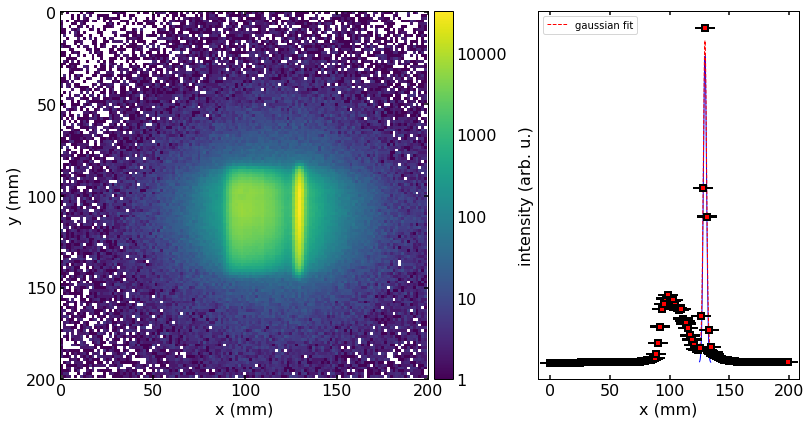

In [3]:
from nicosload import read_pad_file
from ill_datafile.ill_datafile import Datafile
from matplotlib import gridspec
import matplotlib.colors
from matplotlib.ticker import LogFormatter
fig = plt.figure(figsize=(13, 6))
gs = gridspec.GridSpec(1, 2, width_ratios=[2.2, 1])
ax1 = fig.add_subplot(gs[0])
ax0 = fig.add_subplot(gs[1])

data,mes = read_pad_file('data/pad_files/0032{}.pad'.format(5185))
for key in mes:
    print(key, mes[key])
im = ax1.imshow((data[::-1,:]),interpolation= 'none', norm=matplotlib.colors.LogNorm())
ax1.axes.xaxis.set_ticks([0,32,64,96,128])
ax1.axes.yaxis.set_ticks([0,32,64,96,128])
#print(ax.axes.xaxis.get_ticklabels())



formatter = LogFormatter(10, labelOnlyBase=False) 
cb = fig.colorbar(im, ax = ax1,fraction=0.046, pad=0.01, format=formatter)
#cb.set_label('intensity (arb. u.)')
cb.ax.tick_params(which='both', size=3, width=1.5, direction='in')
fig.tight_layout()
xticks = [int(float(k.get_text())*200/128) for k in ax1.get_xticklabels()]
yticks = [int(float(k.get_text())*200/128) for k in ax1.get_yticklabels()]
ax1.axes.xaxis.set_ticklabels(xticks)
ax1.axes.yaxis.set_ticklabels(xticks)

print(xticks,yticks)
print('lasd',mes['dtx_value'],mes['sth_value'])

dat1 = Datafile('asd')
integrated = np.sum((data[::-1,:]),axis = 0)
yerr = integrated**0.5
xs = list(range(0, 128, 128))
#ax0.plot(integrated, linestyle=' ')
#
ax0.axes.yaxis.set_ticks([])

xlabels = []

#xlabels = [int(float(k.get_text())*200/128) for k in ax0.get_xticklabels()]
#ax0.set_xticklabels(xlabels)
plt.tight_layout()
#res = dat1.fit_gauss([k for k in range(len(integrated))],integrated,peaks = 2,\
#                    plotout=False, errs= integrated**0.5,xlabel = 'x',vlines = False)
#
#fig.savefig('/home/cherb/Desktop/LRZ Sync+Share/Doktorarbeit/Mieze/Mieze_Foc/images/paper/secondnightBestfocus.pdf',bbox_inches = 'tight')
#print(sth_vals[47],dtx_vals[4])
xlabels = []
ax0.set_xticks([0,32,64,96,128])
ax0.set_xticklabels([0,32,64,96,128])
for k in ax0.get_xticklabels():
    xlabels.append(int(k.get_text())*200//128)
    print(k.get_text())
print(xlabels)
ax0.set_xticklabels(xlabels)
ax1.set_xlabel('x (mm)')
ax1.set_ylabel('y (mm)')
#dat1.fig,dat1.ax = plt.subplots(1,1) 
# gaussian fit
dat1 = Datafile('asdf')
dat1.ax = ax0
res = dat1.fit_gauss(np.array([k for k in range(len(integrated))]), integrated, peaks = 1,\
                        plotout=1, errs=yerr, xlabel = 'x',vlines = False, xmin=125/200*128, xmax=135/200*128,)
res.params.pretty_print()
ax0.errorbar(x=[k for k in range(len(integrated))], y=integrated, yerr=yerr, linestyle=' ', color='red', \
    markeredgecolor='black', capsize=10)
print(integrated, yerr)
ax0.set_ylabel('intensity (arb. u.)')
ax0.set_xlabel('x (mm)')
handles, labels = ax0.get_legend_handles_labels()
labels = ['gaussian fit']
ax0.legend(handles,labels)
res.params['g0_center'].value
#fig.savefig('/home/cherb/Desktop/LRZ Sync+Share/Doktorarbeit/Paper/NestedOptic/figures/firstnightBestfocus.pdf',bbox_inches = 'tight')

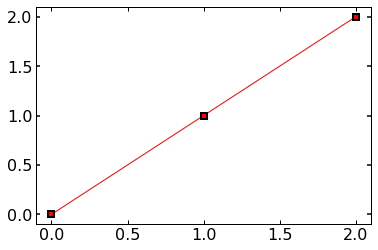

In [1]:
plt.plot(range(3))

# Text


(100, 100)


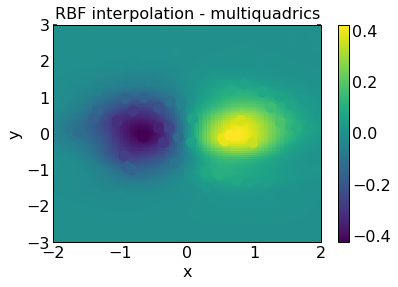

In [15]:
import numpy as np
from scipy.interpolate import Rbf
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
x = np.random.rand(100)*4.0-2.0
y = np.random.rand(100)*6.0-2.0
z = x*np.exp(-x**2-y**2)
xi = np.linspace(-2.0, 2.0, 100)
yi = np.linspace(-3.0, 3.0, 100)
plt.scatter(x, y, 100, z, cmap=cm.jet)
plt.xlabel('x')
plt.ylabel('y')
xx, yy = np.meshgrid(xi, yi)

rbf = Rbf(x, y, z, function='gaussian')
zz = rbf(xx, yy)
print(zz.shape)
plt.pcolor(xx, yy, zz)
plt.scatter(x, y, 100, z)
plt.title('RBF interpolation - multiquadrics')
plt.xlim(-2, 2)
plt.ylim(-3, 3)
plt.colorbar()

